<div style="text-align: center;">
  <font size="5">数値計算による微分方程式解法(python版)</font>
</div>
<div style="text-align: right;">
  <font size="3">cc by Shigeto R. Nishitani</font>
</div>


* /Users/bob/Desktop/maple_ode/python_ode.ipynb
* origin	git@github.com:daddygongon/maple_ode.git (fetch)

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Euler法による落下運動" data-toc-modified-id="Euler法による落下運動-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Euler法による落下運動</a></div><div class="lev2 toc-item"><a href="#重力場中の運動" data-toc-modified-id="重力場中の運動-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>重力場中の運動</a></div><div class="lev2 toc-item"><a href="#Euler法" data-toc-modified-id="Euler法-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Euler法</a></div><div class="lev2 toc-item"><a href="#重力場中の運動をEuler法で解いたら" data-toc-modified-id="重力場中の運動をEuler法で解いたら-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>重力場中の運動をEuler法で解いたら</a></div><div class="lev2 toc-item"><a href="#空気抵抗がある水滴の落下" data-toc-modified-id="空気抵抗がある水滴の落下-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>空気抵抗がある水滴の落下</a></div><div class="lev1 toc-item"><a href="#高精度計算" data-toc-modified-id="高精度計算-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>高精度計算</a></div><div class="lev2 toc-item"><a href="#バネの運動" data-toc-modified-id="バネの運動-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>バネの運動</a></div><div class="lev2 toc-item"><a href="#2次のRunge-Kuttaの導出" data-toc-modified-id="2次のRunge-Kuttaの導出-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2次のRunge-Kuttaの導出</a></div><div class="lev2 toc-item"><a href="#Runge-Kutta2次公式" data-toc-modified-id="Runge-Kutta2次公式-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Runge-Kutta2次公式</a></div><div class="lev2 toc-item"><a href="#Runge-Kutta4次公式" data-toc-modified-id="Runge-Kutta4次公式-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Runge-Kutta4次公式</a></div><div class="lev2 toc-item"><a href="#連立方程式にRunge-Kutta4次公式を" data-toc-modified-id="連立方程式にRunge-Kutta4次公式を-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>連立方程式にRunge-Kutta4次公式を</a></div><div class="lev1 toc-item"><a href="#RLC回路の応答" data-toc-modified-id="RLC回路の応答-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RLC回路の応答</a></div><div class="lev1 toc-item"><a href="#課題" data-toc-modified-id="課題-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>課題</a></div><div class="lev2 toc-item"><a href="#雨粒" data-toc-modified-id="雨粒-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>雨粒</a></div><div class="lev2 toc-item"><a href="#大砲" data-toc-modified-id="大砲-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>大砲</a></div><div class="lev1 toc-item"><a href="#自由課題" data-toc-modified-id="自由課題-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>自由課題</a></div><div class="lev2 toc-item"><a href="#RLC回路" data-toc-modified-id="RLC回路-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>RLC回路</a></div><div class="lev2 toc-item"><a href="#RLC回路" data-toc-modified-id="RLC回路-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>RLC回路</a></div>

# Euler法による落下運動

## 重力場中の運動
重力場中のボールの落下を考えて，１軸で考えた運動方程式を立てます．

$$
\begin{aligned}
v &= \frac{dx}{dt} \\
a &= \frac{d^2 x}{dt^2}
\end{aligned}
$$
質量を$m$, 重力加速度を$g$として，働く力が$F=-mg$であるとすると，ニュートンの運動方程式$F=ma$は，

$$ 
-mg = m \frac{d^2 x}{dt^2}
$$
となります．

![simple_gravitation_fall](./figs/ode.002.jpeg)



## Euler法
1次の微分方程式の一般形は

$$
\frac{dx}{dt}=f(x,t)
$$
と書けます．この微分方程式を簡単な近似から求めるオイラー法を示します．
$x(t+\delta t)$をテイラー級数展開すると，

$$
x(t+\delta t) \simeq x(t) + \frac{dx}{dt} \delta t
$$
となります．これらを代入すると，計算アルゴリズムはつぎのようになります，

$$
x_{i+1} = x_i + f_i\,\delta t
$$
ここで，$f_i$は点($x_i, t_i$)における関数の値です．このアルゴリズムを適用して，$t+\delta t$の座標$x_{i+1}$を一つ前の時間の座標$x_i$から導くことができます．これを重力場中の運動方程式に適用します．

## 重力場中の運動をEuler法で解いたら
Euler法は一階の微分方程式に対する定式化をしています．ところが，重力場中の運動は2階の微分方程式です．このようなときには媒介変数を導入して1次連立方程式に置き直します．

媒介変数として速度$v$を使って，2階の運動方程式
$$
\frac{d^2x}{dt^2} = -g 
$$
が，1階の連立方程式
$$
\begin{aligned}
\frac{dv}{dt} & = -g \\
\frac{dx}{dt} & = v 
\end{aligned}
$$
で置き換えられると考えることに相当します．アルゴリズムにすると，

$$
\begin{aligned}
v_{i+1} &= v_i - g\, dt \\
x_{i+1} &= x_i + v_i\, dt
\end{aligned}
$$
なる連立方程式を解くことに置き換わります．これをpythonで関数にして，さらに計算結果を表示させてみます．

In [1]:
def euler(x0, v0):
  v1 = v0 - g * dt
  x1 = x0 + v0 * dt
  return x1, v1

In [1]:
def euler(x0,v0):
    v1 = v0-g*dt
    x1 = x0+v0*dt
    return x1,v1

Eulerは$x_i$, $v_i$を受け取って，先ほど導いた簡単な計算によって，$v_{i+1}$, $x_{i+1}$を順次計算して返します．結果は，

In [2]:
import matplotlib.pyplot as plt

def my_plot(xx, vv, tt):
    plt.plot(tt, xx, color = 'b', linestyle='--',label="height")
    plt.plot(tt, vv, color = 'r', label="velocity")
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('height and velocity')
    plt.grid()
    plt.show()

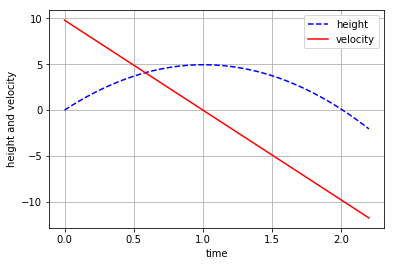

In [9]:
g, dt =9.8, 0.01
# g, dt =9.8, 0.1
#tt,xx,vv=[0.0],[10.0],[0.0] #for compare rain_drop
tt,xx,vv=[0.0],[0.0],[9.8]
# tt,xx,vv=[10.0],[0.0],[0.0]


t = 0.0

for i in range(0,220): #250 for compare rain_drop
  t += dt
  x, v = euler(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

# print(xx)
# print(vv)
my_plot(xx, vv, tt)

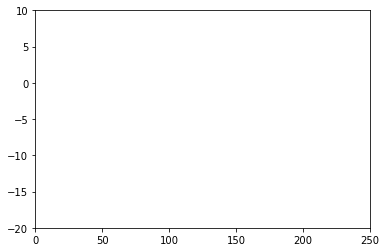

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x_y= np.array(xx)
v_y= np.array(vv)

fig, ax = plt.subplots()
ax.set_xlim(( 0, 250))
ax.set_ylim((-20, 10))
l_x, = ax.plot(x_y, 'b', lw=2)
l_v, = ax.plot(v_y, 'r', lw=2)
plt.close

def init():
    l_x.set_data([], [])
    l_v.set_data([], [])
    return (l_x, l_v)

def animate(i):
    x = np.arange(i)
    l_x.set_data(x, x_y[:i])
    l_v.set_data(x, v_y[:i])
    return (l_x, l_v)

plt.rcParams['animation.html'] = 'html5'

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=250, interval=10, blit=True)

In [5]:
anim

位置(height:$x$)と速度($v$)の時間($t$)変化を表示させています．


時間とともに位置は放物線状に変化し，速度は一定の傾きで増加していく，等加速度運動を再現しています．Euler法ではこのように非常に簡単なcodeによって微分方程式で表される現象をシミュレートできることがわかるでしょう．

## 空気抵抗がある水滴の落下
ballの落下ではわかりにくいですが，より小さな質量の水滴では，速度に比例する空気抵抗が効いてきます．この様子を見ましょう．微分方程式には，

$$
F_x = - C v_x
$$

項が付与されます．そうすると運動方程式は

$$
m \frac{dv_x}{dt} = - C v_x - mg
$$
となります．これにともなったv_xの時間変化に対して，今までは単純に重力加速していたのが，v_xに比例する空気抵抗を記述する項が付与されます．この変化をEuler2に入れ込むと少しの修正ですが，結果は劇的に変化します．

![gravitation_fall_with_air_resistance](./figs/ode.003.jpeg)



その前に，ここで示した修正がどれほど普通の微分方程式の解法としてややこしいかを少し示しておきます．
$$
m \frac{dv_x}{dt} = - C v_x - mg
$$
を整理すると，
$$
\frac{dv_x}{dt} = - \frac{C}{m} v_x - g
$$
です．右辺を$v_x$の係数でくくって，変形していくと，
$$
\begin{aligned}
\frac{dv_x}{dt} & = - \frac{C}{m}\left(v_x - \frac{m}{C}g\right) \\
\frac{1}{\left(v_x - \frac{m}{C}g\right)}dv_x & = - \frac{C}{m}dt
\end{aligned}
$$
これで変数分離されているので積分をとって，
公式$\int \frac{1}{x+a} dx = \log |x+a| + C_1$を使うと
$$
\log \left|v_x - \frac{m}{C}g \right| = - \frac{C}{m} t + C_1
$$
なんですが，両辺の指数をとって「適当」に変形すると
$$
\begin{aligned}
\left| v_x - \frac{m}{C}g\right| & = \exp(- \frac{C}{m}t + C_1 ) \\
v_x &= \frac{gm}{C} + \exp(- \frac{C}{m}t + C_1 )
\end{aligned}
$$
となります．最後の絶対値の変形は怪しいんであまり信頼しないでね．

これをpythonが用意している数式処理libraryのsympyを使うと次の通りとなります．

In [17]:
from sympy import *
v, f = symbols('v f', cls=Function)
cc, t, m, x, g= symbols('cc t m x g')
# dsolve(f(x).diff(x, x) + f(x), f(x))
dsolve(v(t).diff(t)+cc/m*v(t)+g,v(t))

Eq(v(t), (-g*m + exp(cc*(C1 - t/m)))/cc)

In [10]:
def euler2(x0, v0):
  v1 = v0 + (-cc * v0- g) * dt
  x1 = x0 + v0 * dt
  return [x1, v1]


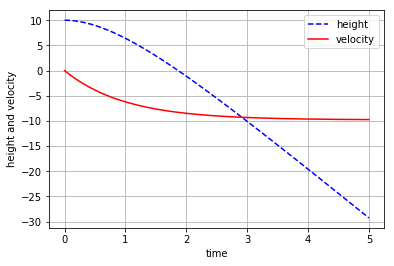

In [13]:
g, dt, cc=9.8, 0.01, 1.0
# tt,xx,vv=[0.0],[0.0],[-10]
tt,xx,vv=[0.0],[10.0],[0.0]
t = 0.0
for i in range(0,500):
  t += dt
  x, v = euler2(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

my_plot(xx, vv, tt)

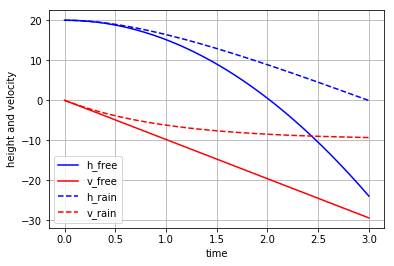

In [11]:
g, dt, cc=9.8, 0.01, 1.0
tt,xx,vv=[0.0],[20.0],[0.0]
xx1,vv1=[20.0],[0.0]

t = 0.0
for i in range(0,300):
  t += dt
  x, v = euler(xx[-1],vv[-1])
  x1, v1 = euler2(xx1[-1],vv1[-1])

  tt.append(t)
  xx.append(x)
  vv.append(v)
  xx1.append(x1)
  vv1.append(v1)


plt.plot(tt, xx, color = 'b', label="h_free")
plt.plot(tt, vv, color = 'r', label="v_free")
plt.plot(tt, xx1, color = 'b', linestyle='--',label="h_rain")
plt.plot(tt, vv1, color = 'r', linestyle='--',label="v_rain")
plt.legend()
plt.xlabel('time')
plt.ylabel('height and velocity')
plt.grid()
plt.show()

ちょっと気をつけたいのは，$-Cv$の向きです．vは例えば自由落下の時には下向きのベクトルなんで，抵抗は反対向き，すなわち上むき，数値的には正，になります．

In [22]:
# %notebook inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x_y= np.array(xx)
v_y= np.array(vv)

fig, ax = plt.subplots()
ax.set_xlim(( 0, 50))
ax.set_ylim((-20, 10))

l_x, = ax.plot(x_y, 'b', lw=2)
l_v, = ax.plot(v_y, 'r', lw=2)
plt.close

def init():
    l_x.set_data([], [])
    l_v.set_data([], [])
    return (l_x, l_v)

def animate(i):
    x = np.arange(i)
    l_x.set_data(x, x_y[:i])
    l_v.set_data(x, v_y[:i])
    return (l_x, l_v)

plt.rcParams['animation.html'] = 'html5'

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)

In [23]:
anim

# 高精度計算

## バネの運動
今度はバネの運動です．空気抵抗との違いはほんの少しで，
$$
F_x = -k x
$$
と今度は，位置xに力が比例することです．そうすると運動方程式は，

$$
m \frac{dv_x}{dt} = - k x
$$
となります．

連立方程式は
$$
\begin{aligned}
\frac{dv}{dt} & = - \frac{k}{m}x \\
\frac{dx}{dt} & = v
\end{aligned}
$$
となるんで，アルゴリズムに置き換えると，

$$
\begin{aligned}
v_{i+1} & = v_i - \frac{k}{m} x_i\, dt \\
x_{i+1} & = x_i + v_i\, dt
\end{aligned}
$$
なる連立方程式を解くことに置き換わります．これをpythonで関数にして，さらに計算結果を表示させてみます．

![free_oscillation_mass_spring_system](./figs/ode.004.jpeg)



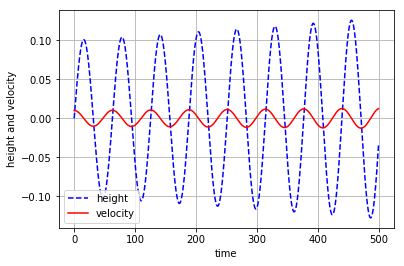

In [17]:
def euler3(x0,v0):
  v1 = v0 +(- k * x0) * dt
  x1 = x0 + v0 * dt
  return [x1, v1]

t, dt, k=0.0, 0.1, 0.01
tt,xx,vv=[0.0],[0.0],[0.01]
for i in range(0,5000):
  t += dt
  x, v = euler3(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

my_plot(xx, vv, tt)

kはあらかじめ$m$で割られて正規化されているとします．これをEuler法で計算すると上のような結果が得られます．

徐々に発散していく様子がわかると思います．本来，摩擦のないバネは定常的に振動します．この発散の原因は，Euler法の計算誤差が大きいせいです．そこで，より精度の高いRunge-Kutta法を導入します．


## 2次のRunge-Kuttaの導出
一般にRunge-Kutta法と呼ばれる手法は，4次の古典的Runge-Kutta法を指します．導出は意外と面倒なので，2次の場合のさわりを紹介して，そこからの類推としましょう．$x,v,t$などのパラメータ名を変更しますのでご注意あれ．

(「ANSI Cによる数値計算法」堀之内聰一，酒井幸吉，榎園茂，森北2002, p.133)
テイラー展開により，$h^2$の精度まで展開する．
$$
y(x_0+h) = y(x_0) +y_0'h+\frac{1}{2!}y_0''h^2 + O(h^3)
$$

この式において，$y_0' = f(x_0,y_0)$は既知とする．一方，$y_0''$は$f(x_0,y_0)$から直接的には求められない．したがって，この式の右辺と$h^2$の項まで一致する近似値を，$f(x_0,y_0)$だけを既知として算出する方法を考えよう．

平均値の定理より，
$$
\Delta y = y(x_0+h)-y(x_0) = hy'(x_0 + \theta h), \, 0<\theta<1
$$

$y'(x_0 +\theta h)$の近似値として，$\theta=0, \theta=1$の場合を考えると，
$$
\begin{aligned}
\Delta y &\simeq hy'(x_0) \, &{\textrm where}\, &\theta=0\\
\Delta y &\simeq hy'(x_0+h)  \, &{\textrm where}\, &\theta=1
\end{aligned}
$$
これらの値は単独では$\Delta y$に対して$h^2$の精度をもつ近似値にならないが，これらの一次結合$\alpha h y'(x_0)+\beta hy'(x_0+h)$を$\alpha, \beta$をうまく定めることによって，$\Delta y$の$h^2$の精度をもつ近似値にすることができる．実際，
$$
\begin{aligned}
\alpha h y'(x_0)+\beta hy'(x_0+h) & =\alpha h y'(x_0)+\beta h \{y'(x+0)+y''(x_0)h+O(h^2)\} \\
& =(\alpha+\beta)hy'_0 + \beta h^2 y_0'' + O(h^3)
\end{aligned}
$$

したがって，テイラー展開式と係数を比較して，
$$
\begin{aligned}
\alpha + \beta = 1, \, \beta = \frac{1}{2}\\
\alpha = \frac{1}{2}, \, \beta =\frac{1}{2}
\end{aligned}$$
となり，

$$
\Delta y = \frac{1}{2}hy'(x_0) + \frac{1}{2}hy'(x_0+h)+O(h^3)
$$

いま，
$$
k_1 =hy'(x_0) =hf(x_0,y_0)
$$

とおこう．上式に代入して，
$$
\begin{aligned}
hy'(x_0+h) &= hf(x_0+h,y(x_0+h)) \\
& =hf(x_0+h, y(x_0)+y'(x_o)h+O(h^2)) \\
& =hf(x_0+h, y_0+k_1+O(h^2)) \\
& =hf(x_0+h, y_0+k_1)+O(h^2)
\end{aligned}$$

したがって，
$$
k_2 = hf(x_0+h, y_0+k_1)
$$
とおけば，
$$
\Delta y = \frac{1}{2}k_1 + \frac{1}{2}k_2 + O(h^3)
$$
となる．これより，
$$
k = \frac{1}{2}(k_1+k_2), y_1 = y_0 +k
$$

とおくと，$y(x_0+h) = y_1+O(h^3)$となり，$y_1$は$h^2$の精度の近似値となる．

## Runge-Kutta2次公式
こうして得られたRunge-Kuttaの２次の公式を定義すると次の通りです．

微分方程式
$$
\frac{dy}{dx} = f(x,y), \, where \, y(x_0)=y_0
$$

の数値解は，刻み幅を$h$，$x_n=x_0+nh$として，次の漸化式
$$
y_{n+1} = y_n +k (n=0,1,2,\cdots)
$$
で与えられる．ここに，$k$は次で定める．
$$
\begin{aligned}
k_1 & = hf(x_n,y_n), \\
k_2 & = hf(x_n+h, y_n+k_1), \\
k & = \frac{1}{2}(k_1+k_2)
\end{aligned}
$$

## Runge-Kutta4次公式
2次と同様の考え方で，$h^4$の精度を持つRunge-Kutta４次公式を作ることができる．

微分方程式
$$
\frac{dy}{dx} = f(x,y), \, {\textrm where}y(x_0)=y_0
$$

の数値解は，刻み幅を$h$，$x_n=x_0+nh$として，次の漸化式
$$
y_{n+1} = y_n +k (n=0,1,2,\cdots)
$$
で与えられる．ここに，$k$は次で定める．
$$
\begin{aligned}
k_1 & = hf(x_n,y_n), \\
k_2 & = hf(x_n+\frac{h}{2}, y_n+\frac{k_1}{2}), \\
k_3 & = hf(x_n+\frac{h}{2}, y_n+\frac{k_2}{2}), \\
k_4 & = hf(x_n+h, y_n+k_3), \\
k & = \frac{1}{6}(k_1+2k_2+2k_3+k_4)
\end{aligned}
$$

## 連立方程式にRunge-Kutta4次公式を
連立微分方程式
$$
\begin{aligned}
\frac{dy}{dx} &= f(x,y,z), &\, \, where \, y(x_0)=y_0 \\
\frac{dz}{dx} &= g(x,y,z), &\, \, where \, z(x_0)=z_0 \\
\end{aligned}
$$

の数値解は，刻み幅を$h$，$x_n=x_0+nh$として，次の漸化式
$$
\begin{aligned}
y_{n+1} & = y_n +k &\, (n=0,1,2,\cdots) \\
z_{n+1} & = z_n +l &\, (n=0,1,2,\cdots) \\
\end{aligned}
$$
で与えられる．ここに，$k,l$は次で定める．
$$
\begin{aligned}
k_1 &= hf(x_n,y_n,z_n), \,
&l_1 &= hg(x_n,y_n,z_n), \\
k_2 &= hf(x_n+\frac{h}{2}, y_n+\frac{k_1}{2}, z_n+\frac{l_1}{2}), \,
&l_2 &= hg(x_n+\frac{h}{2}, y_n+\frac{k_1}{2}, z_n+\frac{l_1}{2}), \\
k_3 &= hf(x_n+\frac{h}{2}, y_n+\frac{k_2}{2}, z_n+\frac{l_2}{2}), \,
&l_3 &= hg(x_n+\frac{h}{2}, y_n+\frac{k_2}{2}, z_n+\frac{l_2}{2}), \\
k_4 &= hf(x_n+h, y_n+k_3, z_n+l_3), \,
&l_4 &= hg(x_n+h, y_n+k_3, z_n+l_3), \\
k &= \frac{1}{6}(k_1+2k_2+2k_3+k_4), \,
&l &= \frac{1}{6}(l_1+2l_2+2l_3+l_4)
\end{aligned}
$$

In [18]:
def runge_kutta4(x0,y0,z0,h):
  k1= h * ff(x0, y0, z0);
  l1= h * gg(x0, y0, z0);
  k2= h * ff(x0 + h/2, y0 + k1/2, z0 + l1/2)
  l2= h * gg(x0 + h/2, y0 + k1/2, z0 + l1/2)
  k3= h * ff(x0 + h/2, y0 + k2/2, z0 + l2/2)
  l3= h * gg(x0 + h/2, y0 + k2/2, z0 + l2/2)
  k4= h * ff(x0 + h,   y0 + k3,   z0 + l3)
  l4= h * gg(x0 + h,   y0 + k3,   z0 + l3)
  kk= 1.0/6*(k1 + 2*k2 + 2*k3 + k4)
  ll= 1.0/6*(l1 + 2*l2 + 2*l3 + l4)
  return [kk,ll]

Runge-Kuttaの４次公式をそのままcodingすると上のようになります．これを先ほどのバネ運動の問題に当てはめてみましょう．

先ほど導出した運動方程式の漸化式
$$
\begin{aligned}
v_{i+1} & = v_i - \frac{k}{m} x_i\, dt \\
x_{i+1} & = x_i + v_i\, dt
\end{aligned}
$$

とRunge-Kutta4次公式を示した連立微分方程式
$$
\begin{aligned}
\frac{dy}{dx} &= f(x,y,z), \, where \, y(x_0)=y_0 \\
\frac{dz}{dx} &= g(x,y,z), \, where \, z(x_0)=z_0 \\
\end{aligned}
$$
とを比べて，変数の表記の違いと関数$f,g$を具体的に書き下します．

| 4次の公式 | 運動方程式 |
|:-----:|:-----:|
|x | t |
|y | x |
|z | v |
|f(x,y,z) | f(t,x,v) = v |
|g(x,y,z) | g(t,x,v) = -k x |

この変数の書き換えを吸収する中間関数としてEuler3を書き換えます．RungeKutta4の仮引数を上の表に従って置き換えて，数値を渡しています．また，関数$f,g$も定義しておきます．

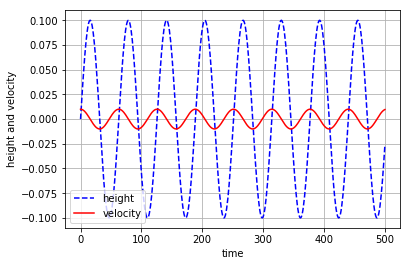

In [19]:
def ff(t,x,v):
  return v

def gg(t,x,v):
  return -k*x

def ode(x0, v0):
  kk,ll = runge_kutta4(0, x0, v0, dt)
  x1 = x0 + kk
  v1 = v0 + ll
  return [x1, v1]

t, dt, k=0.0, 1, 0.01
tt,xx,vv=[0.0],[0.0],[0.01]
for i in range(0,500):
  t += dt
  x, v = ode(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

my_plot(xx, vv, tt)

これを前と同様に走らせると
発散も収束もすることなく，定常的に振動を繰り返していることが見て取れます．

In [20]:
# %notebook inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

t_t= np.array(tt)
x_y= np.array(xx)
v_y= np.array(vv)

fig, ax = plt.subplots()
ax.set_xlim(( 0, 500))
ax.set_ylim((-0.1,0.1))
plt.hlines(0, 0, 500, color='k', linestyle='-', linewidth=1)
l_x, = ax.plot(x_y, 'b', lw=2)
l_v, = ax.plot(v_y, 'r', lw=2)
plt.close

def init():
    l_x.set_data([], [])
    l_v.set_data([], [])
    return (l_x, l_v)

def animate(i):
    x = t_t[:i]
    l_x.set_data(x, x_y[:i])
    l_v.set_data(x, v_y[:i])
    return (l_x, l_v)

plt.rcParams['animation.html'] = 'html5'

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=50, blit=True)

In [14]:
anim

# RLC回路の応答
電気回路の応答を考えましょう．R(resistor,抵抗) L(inductor,コイル) C(capacitor,コンデンサー)をそれぞれふたつずつ組み合わせてみていくのが常套手段なんですが，一個ずつだと面倒なので，まずは全部入れた方程式を立てます．そこからパラメータを変えて回路の挙動を観察します．こんなとこから進めていけるのが，数値計算の利点です．どんなんでも解けるから．

コンデンサに蓄えられた電荷を$Q(t)$, 回路に流れる電流を$I(t)$とします．

* 自己インダクタンス$L$のコイルにかかる電圧は$L \frac{dI}{dt}$
* 容量$C$のコンデンサにかかる電圧は$\frac{Q}{C}$
* 抵抗値$R$の抵抗に掛かる電圧は$RI$

となります．コイルにかかる電圧，コンデンサにかかる電圧，抵抗にかかる電圧の和が，この回路にかけた電圧$V(t)$であることを使うと，

$$
L \frac{dI}{dt} + \frac{Q}{C} + RI = V(t)
$$

となります．ここで電流$I$とコンデンサの電荷$Q$の関係$I=\frac{dQ}{dt}$を使うと，

$$
L \frac{d^2Q}{dt^2} + \frac{Q}{C} + R\frac{dQ}{dt} = V{t}
$$
が得られます．

先ほどの重力系の問題と比べると

$$
v \rightarrow i \\
x \rightarrow q
$$
と置き換えれば良さそうです．

そうするとアルゴリズムは，
$$
\begin{aligned}
i_{i+1} & = i_i + (V - RR \, i_i -qc \, q_i) \, dt \\
q_{i+1} & = q_i + i_i \, dt;
\end{aligned}
$$
となりそうです．RRやqcには適当に規格化した値をいれます．

![rlc_circuit](./figs/ode.005.jpeg)



In [23]:
def euler_rlc(q0, i0):
  i1 = i0 + (v - r * i0 - qc * q0) * dt
  q1 = q0 + i0 * dt
  return [q1, i1]

コンデンサー($C$),コンダクター($L$)を1として，抵抗値を0.5として，入力電圧を1Vと設定してコンデンサーにたまる電荷と電流の変化を確かめたのが次の図です．


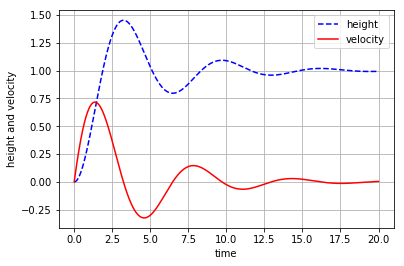

In [25]:
dt, r, qc, v =0.01, 0.5, 1, 1
ii=[0.0]
qq=[0.0]
tt=[0.0]
t = 0
for i in range(0,2000):
  t += dt
  q, i2 = euler_rlc(qq[i],ii[i])
  tt.append(t)
  qq.append(q)
  ii.append(i2)

my_plot(qq,ii,tt)

入力電圧を0V，コンデンサーにあらかじめ1クーロン貯めたと設定して電荷と電流の時間変化を確かめたのが次の図です．


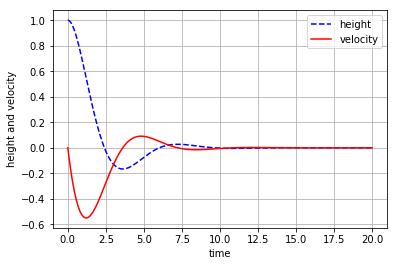

In [28]:
dt, r, qc, v =0.01, 1.0, 1, 0
ii=[0.0]
qq=[1.0]
tt=[0.0]
t = 0
for i in range(0,2000):
  t += dt
  q, i2 = euler_rlc(qq[i],ii[i])
  tt.append(t)
  qq.append(q)
  ii.append(i2)

my_plot(qq,ii,tt)

# 課題

## 雨粒
空気抵抗を受ける雨粒の速度の変化を自分の言葉で説明しなさい．

## 大砲
free fallの初期設定を変えて，x=0から鉛直方向にv=9.8で投げ上げたボールの時間変化を示しなさい．

# 自由課題
以下はpythonの環境がある人はやってみてください．

## RLC回路
抵抗が0の場合の電荷，電流の変化を確認しなさい．

## RLC回路
抵抗が0の場合にも，エネルギー保存が成り立つようにコードを改良しなさい．
